In [1]:
import pandas as pd
from tensorflow.keras import layers, models,Sequential
from keras.layers import Dense, Input,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split 
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv('Processed_Data_Only_Numerical.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df

,Market_Value,overall,potential,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,attack_work_rate,defense_work_rate,LWB,LB,CAM,RWB,CM,RB,CF,CB,CDM,RM,LW,LM,RW,ST
0,3000000,0.571429,0.533333,0.478261,0.666667,0.413793,0.00,0.75,0.333333,0.0,0.402778,0.6000,0.710145,0.661765,0.662162,0.650794,0.719512,0.517647,0.524390,0.774648,0.658537,0.6875,0.698795,0.518072,0.779221,0.742857,0.426667,0.375000,0.492958,0.636364,0.632911,0.746988,0.514286,0.608696,0.623377,0.743902,0.734940,0.753086,0.571429,0.746988,0.388235,0.5625,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3000000,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0.0,0.402778,0.5750,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.524390,0.718310,0.658537,0.6750,0.698795,0.518072,0.766234,0.714286,0.426667,0.375000,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.610390,0.707317,0.734940,0.753086,0.571429,0.734940,0.388235,0.5375,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2400000,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0.0,0.402778,0.5750,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.524390,0.718310,0.658537,0.6750,0.698795,0.518072,0.766234,0.714286,0.426667,0.375000,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.610390,0.707317,0.734940,0.753086,0.571429,0.734940,0.388235,0.5375,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2800000,0.510204,0.577778,0.347826,0.666667,0.413793,0.00,0.75,0.000000,0.0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.6750,0.662651,0.409639,0.727273,0.714286,0.506667,0.375000,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.734940,0.388235,0.5750,0.7250,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2500000,0.510204,0.577778,0.347826,0.666667,0.413793,0.00,0.75,0.000000,0.0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.6750,0.662651,0.409639,0.727273,0.714286,0.506667,0.375000,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.734940,0.388235,0.5750,0.7250,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46179,3000000,0.489796,0.622222,0.217391,0.583333,0.379310,0.00,1.00,0.000000,0.0,0.333333,0.2125,0.420290,0.397059,0.783784,0.666667,0.402439,0.188235,0.634146,0.507042,0.170732,0.3750,0.253012,0.168675,0.649351,0.428571,0.373333,0.305556,0.535211,0.575758,0.556962,0.530120,0.828571,0.623188,0.675325,0.109756,0.590361,0.777778,0.202381,0.506024,0.282353,0.8125,0.7875,0.753086,0.361111,0.31250,0.350,0.31250,0.166667,0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46180,3000000,0.530612,0.755556,0.130435,0.583333,0.379310,0.00,0.75,0.000000,0.0,0.472222,0.2125,0.420290,0.367647,0.78

In [5]:
scaler = StandardScaler()
X = df.drop(columns=['Market_Value'])
y = df['Market_Value']

X = scaler.fit_transform(X)

y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)

In [6]:
X.shape

(46184, 64)

In [7]:
y.shape

(46184, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.20,) 

In [9]:
print('X_train Shape: ',X_train.shape,'|  y_train Shape: ', y_train.shape)
print('X_test Shape: ',X_test.shape,'  |  y_train Shape: ',y_test.shape)

X_train Shape:  (36947, 64) |  y_train Shape:  (36947, 1)
X_test Shape:  (9237, 64)   |  y_train Shape:  (9237, 1)


In [10]:
trainResults = []
testResults  = []
mseResults = []
maeResults = []

# Basic model 

In [12]:
mostBasicModel = Sequential([
    Input(shape=(64,)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  
])

mostBasicModel.compile(optimizer='adam', 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 


history = mostBasicModel.fit(X_train, y_train, 
                    epochs=300,
                    verbose=1)

print('Test Performance')
y_pred = mostBasicModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)


mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = mostBasicModel.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)


Epoch 1/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 0.7083 - root_mean_squared_error: 0.8401
Epoch 2/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.5266 - root_mean_squared_error: 0.7251
Epoch 3/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.4587 - root_mean_squared_error: 0.6769
Epoch 4/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.5359 - root_mean_squared_error: 0.7304
Epoch 5/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.4235 - root_mean_squared_error: 0.6499
Epoch 6/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.3984 - root_mean_squared_error: 0.6305
Epoch 7/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.3470 - root_mean_squared_error: 0.5884
Epoch 8/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.4142 - root_mean_squared_error: 0.6401
Epoch 9/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.3125 - root_mean_squared_error: 0.5577
Epoch 10/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s

In [13]:
mostBasicModel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,925 (195.02 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,284 (130.02 KB)

# basic model with early stopping

In [15]:
mostBasicModel1 = Sequential([
    Input(shape=(64,)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) 
])
mostBasicModel1.compile(optimizer='Adam', 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = mostBasicModel1.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

print('Test Performance')
y_pred = mostBasicModel1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)


mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = mostBasicModel1.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - loss: 0.6913 - root_mean_squared_error: 0.8281 - val_loss: 0.5313 - val_root_mean_squared_error: 0.7289
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.5426 - root_mean_squared_error: 0.7355 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6614
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.4977 - root_mean_squared_error: 0.7043 - val_loss: 0.4424 - val_root_mean_squared_error: 0.6651
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.4543 - root_mean_squared_error: 0.6734 - val_loss: 0.4177 - val_root_mean_squared_error: 0.6463
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.4004 - root_mean_squared_error: 0.6318 - val_loss: 0.4664 - val_root_mean_squared_error: 0.6830
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.4180 - root_mean_squared_error: 0.6459 - val_loss: 0.4208 - val_root_mean_squared_error: 0.6487
Epoch 7/300
924/924 ━━━━━━━━━━━━━━

# basic model with early stopping and dropout

In [17]:
mostBasicModel2 = Sequential([
    Input(shape=(64,)),  
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1) 
])

mostBasicModel2.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = mostBasicModel2.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])


print('Test Performance')
y_pred = mostBasicModel2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = mostBasicModel2.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - loss: 0.7676 - root_mean_squared_error: 0.8754 - val_loss: 0.5221 - val_root_mean_squared_error: 0.7226
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.5707 - root_mean_squared_error: 0.7549 - val_loss: 0.5998 - val_root_mean_squared_error: 0.7745
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.5844 - root_mean_squared_error: 0.7637 - val_loss: 0.5165 - val_root_mean_squared_error: 0.7187
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.5713 - root_mean_squared_error: 0.7550 - val_loss: 0.4659 - val_root_mean_squared_error: 0.6826
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.5158 - root_mean_squared_error: 0.7177 - val_loss: 0.4436 - val_root_mean_squared_error: 0.6660
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.5512 - root_mean_squared_error: 0.7408 - val_loss: 0.4334 - val_root_mean_squared_error: 0.6583
Epoch 7/300
924/924 ━━━━━━━━━━━━━━

## basic model with different learning rate extra experiment

In [19]:
mostBasicModelExtra = Sequential([
    Input(shape=(64,)),  
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) 
])
mostBasicModelExtra.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 

history = mostBasicModelExtra.fit(X_train, y_train, 
                    epochs=300, 
                    verbose=1, )

print('Test Performance')
y_pred = mostBasicModelExtra.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mae = mean_absolute_error(normalizedTest, normalizedPred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = mostBasicModelExtra.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)



Epoch 1/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - loss: 0.9272 - root_mean_squared_error: 0.9560
Epoch 2/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.6321 - root_mean_squared_error: 0.7941
Epoch 3/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.6276 - root_mean_squared_error: 0.7880
Epoch 4/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.5327 - root_mean_squared_error: 0.7287
Epoch 5/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.5340 - root_mean_squared_error: 0.7303
Epoch 6/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.4930 - root_mean_squared_error: 0.7014
Epoch 7/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.4768 - root_mean_squared_error: 0.6903
Epoch 8/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.4879 - root_mean_squared_error: 0.6983
Epoch 9/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.4710 - root_mean_squared_error: 0.6858
Epoch 10/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 0s

# Complexer Model

In [21]:
complexModel = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

complexModel.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

history = complexModel.fit(X_train, y_train, 
                    epochs=300, 
                    verbose=1)

print('Test Performance')
y_pred = complexModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = complexModel.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6762 - root_mean_squared_error: 0.8216
Epoch 2/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5986 - root_mean_squared_error: 0.7732
Epoch 3/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5307 - root_mean_squared_error: 0.7276
Epoch 4/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4918 - root_mean_squared_error: 0.6983
Epoch 5/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4543 - root_mean_squared_error: 0.6735
Epoch 6/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4340 - root_mean_squared_error: 0.6572
Epoch 7/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4323 - root_mean_squared_error: 0.6566
Epoch 8/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.4354 - root_mean_squared_error: 0.6584
Epoch 9/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3928 - root_mean_squared_error: 0.6260
Epoch 10/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 

In [22]:
mse = mean_squared_error(normalizedTest, normalizedPred)
mae = mean_absolute_error(normalizedTest, normalizedPred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 7442903247183.267
Mean Absolute Error (MAE): 978782.2386012397


In [23]:
complexModel.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,717 (8.74 MB)

 Trainable params: 763,905 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,527,812 (5.83 MB)

# complexer model with early stopping

In [25]:
complexModel1 = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

complexModel1.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = complexModel1.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Test Performance')
y_pred = complexModel1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)


mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


print('Train Performance')
y_pred = complexModel1.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7534 - root_mean_squared_error: 0.8626 - val_loss: 0.5948 - val_root_mean_squared_error: 0.7713
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6312 - root_mean_squared_error: 0.7930 - val_loss: 0.5373 - val_root_mean_squared_error: 0.7330
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5440 - root_mean_squared_error: 0.7366 - val_loss: 0.4603 - val_root_mean_squared_error: 0.6785
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5455 - root_mean_squared_error: 0.7383 - val_loss: 0.7951 - val_root_mean_squared_error: 0.8917
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5583 - root_mean_squared_error: 0.7453 - val_loss: 0.4391 - val_root_mean_squared_error: 0.6627
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4865 - root_mean_squared_error: 0.6971 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6731
Epoch 7/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4m

# complexer model with early stopping and dropout

In [27]:
complexModel2 = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

complexModel2.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = complexModel2.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

print('Test Performance')
y_pred = complexModel2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


print('Train Performance')
y_pred = complexModel2.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7434 - root_mean_squared_error: 0.8611 - val_loss: 0.5882 - val_root_mean_squared_error: 0.7669
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6617 - root_mean_squared_error: 0.8125 - val_loss: 0.5134 - val_root_mean_squared_error: 0.7165
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7013 - root_mean_squared_error: 0.8342 - val_loss: 0.5538 - val_root_mean_squared_error: 0.7442
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5826 - root_mean_squared_error: 0.7620 - val_loss: 0.5675 - val_root_mean_squared_error: 0.7533
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6373 - root_mean_squared_error: 0.7972 - val_loss: 0.4774 - val_root_mean_squared_error: 0.6909
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.5465 - root_mean_squared_error: 0.7380 - val_loss: 0.4756 - val_root_mean_squared_error: 0.6896
Epoch 7/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 4m

In [28]:
complexModel2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,291,717 (8.74 MB)

 Trainable params: 763,905 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,527,812 (5.83 MB)

# complexer model with l1 l2 regularization

In [30]:
from keras.regularizers import l1, l2

model2 = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu', kernel_regularizer=l1(0.01)),  
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  
    Dense(256, activation='relu', kernel_regularizer=l1(0.01)),  
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),   
    Dense(1)  
])

model2.compile(optimizer = 'adam',
              loss='mean_squared_error',
              metrics=[RootMeanSquaredError()])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model2.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

print('Test Performance')
y_pred = model2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mae = mean_absolute_error(normalizedTest, normalizedPred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print('Train Performance')
y_pred = model2.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 13.7941 - root_mean_squared_error: 0.8419 - val_loss: 0.9696 - val_root_mean_squared_error: 0.7397
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.0545 - root_mean_squared_error: 0.7920 - val_loss: 0.9325 - val_root_mean_squared_error: 0.7332
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.9744 - root_mean_squared_error: 0.7626 - val_loss: 1.0915 - val_root_mean_squared_error: 0.8317
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.9461 - root_mean_squared_error: 0.7496 - val_loss: 0.8872 - val_root_mean_squared_error: 0.7166
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.9256 - root_mean_squared_error: 0.7460 - val_loss: 0.8628 - val_root_mean_squared_error: 0.7099
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8769 - root_mean_squared_error: 0.7203 - val_loss: 0.8649 - val_root_mean_squared_error: 0.7156
Epoch 7/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5

# Most complex model 

In [32]:
mostComplexModel = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

mostComplexModel.compile(optimizer='adam', 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 

history = mostComplexModel.fit(X_train, y_train, 
                    epochs=300,
                    verbose=1, 
                    )  

print('Test Performance')
y_pred = mostComplexModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)


normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



print('Train Performance')
y_pred = mostComplexModel.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.7333 - root_mean_squared_error: 0.8549
Epoch 2/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.7795 - root_mean_squared_error: 0.8792
Epoch 3/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.6323 - root_mean_squared_error: 0.7930
Epoch 4/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6498 - root_mean_squared_error: 0.8049
Epoch 5/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5348 - root_mean_squared_error: 0.7306
Epoch 6/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5184 - root_mean_squared_error: 0.7189
Epoch 7/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.5211 - root_mean_squared_error: 0.7212
Epoch 8/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4785 - root_mean_squared_error: 0.6909
Epoch 9/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4839 - root_mean_squared_error: 0.6941
Epoch 10/300
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 

In [33]:
mostComplexModel.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544,773 (9.71 MB)

 Trainable params: 848,257 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,696,516 (6.47 MB)

# Complex model with early stopping

In [35]:
mostComplexModel1 = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

mostComplexModel1.compile(optimizer='adam', 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mostComplexModel1.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

print('Test Performance')
y_pred = mostComplexModel1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


print('Train Performance')
y_pred = mostComplexModel1.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8055 - root_mean_squared_error: 0.8959 - val_loss: 0.5386 - val_root_mean_squared_error: 0.7339
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8254 - root_mean_squared_error: 0.9062 - val_loss: 0.5202 - val_root_mean_squared_error: 0.7212
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6170 - root_mean_squared_error: 0.7837 - val_loss: 0.5155 - val_root_mean_squared_error: 0.7180
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5847 - root_mean_squared_error: 0.7629 - val_loss: 0.5610 - val_root_mean_squared_error: 0.7490
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5084 - root_mean_squared_error: 0.7123 - val_loss: 0.6713 - val_root_mean_squared_error: 0.8194
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.5697 - root_mean_squared_error: 0.7538 - val_loss: 0.4520 - val_root_mean_squared_error: 0.6723
Epoch 7/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5m

# Complex model with early stopping and dropout

In [37]:
mostComplexModel2 = Sequential([
    Input(shape=(64,)),  
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

mostComplexModel2.compile(optimizer='adam', 
              loss='mean_squared_error',
               metrics=[RootMeanSquaredError()]) 

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mostComplexModel2.fit(X_train, y_train, 
                    epochs=300,
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])

print('Test Performance')
y_pred = mostComplexModel2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Skoru:", r2)
testResults.append(r2)

normalizedTest = scaler.inverse_transform(y_test)
normalizedPred = scaler.inverse_transform(y_pred)

mse = mean_squared_error(normalizedTest, normalizedPred)
mseResults.append(mse)
mae = mean_absolute_error(normalizedTest, normalizedPred)
maeResults.append(mae)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


print('Train Performance')
y_pred = mostComplexModel2.predict(X_train)
r2 = r2_score(y_train, y_pred)
print("R² Skoru:", r2)
trainResults.append(r2)

Epoch 1/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.8393 - root_mean_squared_error: 0.9141 - val_loss: 0.5293 - val_root_mean_squared_error: 0.7275
Epoch 2/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6551 - root_mean_squared_error: 0.8087 - val_loss: 0.7162 - val_root_mean_squared_error: 0.8463
Epoch 3/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.7184 - root_mean_squared_error: 0.8464 - val_loss: 0.6017 - val_root_mean_squared_error: 0.7757
Epoch 4/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.5795 - root_mean_squared_error: 0.7605 - val_loss: 0.5605 - val_root_mean_squared_error: 0.7487
Epoch 5/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6806 - root_mean_squared_error: 0.8241 - val_loss: 0.5076 - val_root_mean_squared_error: 0.7125
Epoch 6/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.5293 - root_mean_squared_error: 0.7261 - val_loss: 0.5233 - val_root_mean_squared_error: 0.7234
Epoch 7/300
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 6m

In [38]:
mostComplexModel2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544,773 (9.71 MB)

 Trainable params: 848,257 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,696,516 (6.47 MB)

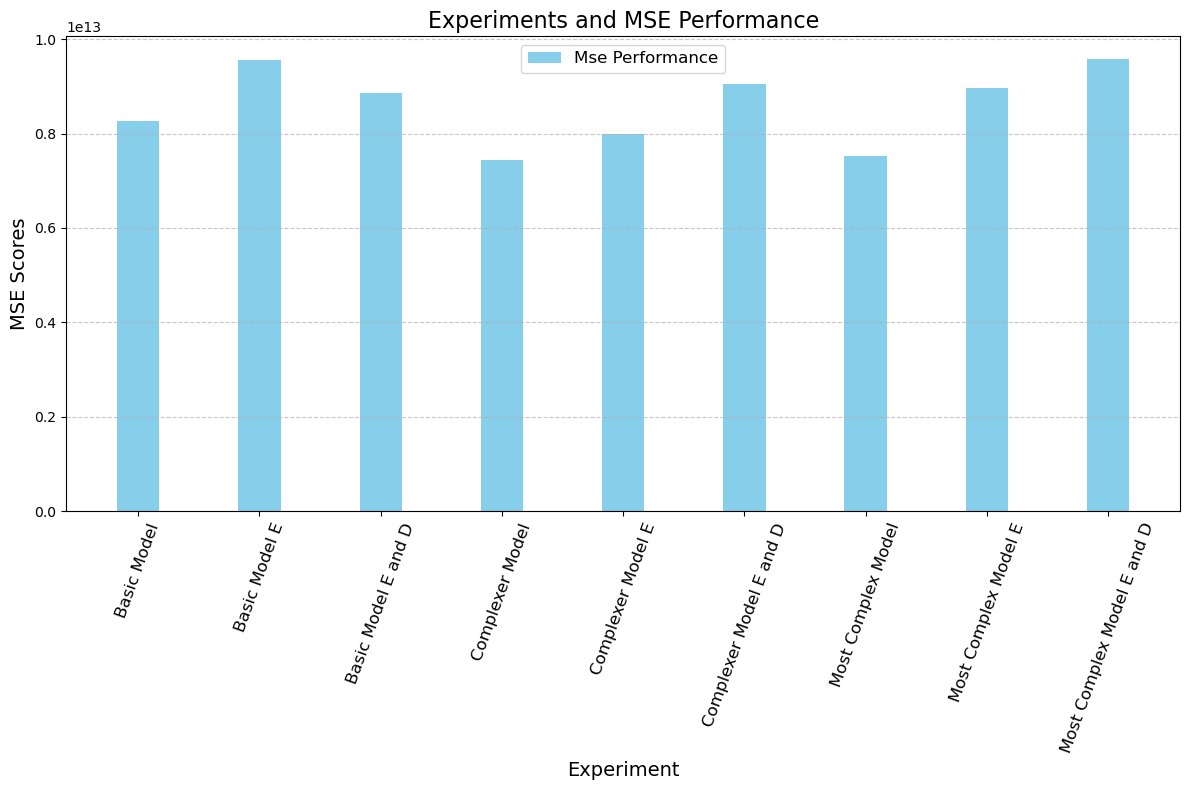

In [111]:
import matplotlib.pyplot as plt
import numpy as np
classes = ['Basic Model','Basic Model E' ,'Basic Model E and D','Complexer Model','Complexer Model E','Complexer Model E and D','Most Complex Model', 'Most Complex Model E', 'Most Complex Model E and D' ]

x = np.arange(len(classes))  
width = 0.35 

plt.figure(figsize=(12, 8))
plt.bar(x, mseResults, width, label='Mse Performance', color='skyblue') 

plt.title('Experiments and MSE Performance', fontsize=16)
plt.xlabel('Experiment', fontsize=14)
plt.ylabel('MSE Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12, rotation=70)  
plt.legend(fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

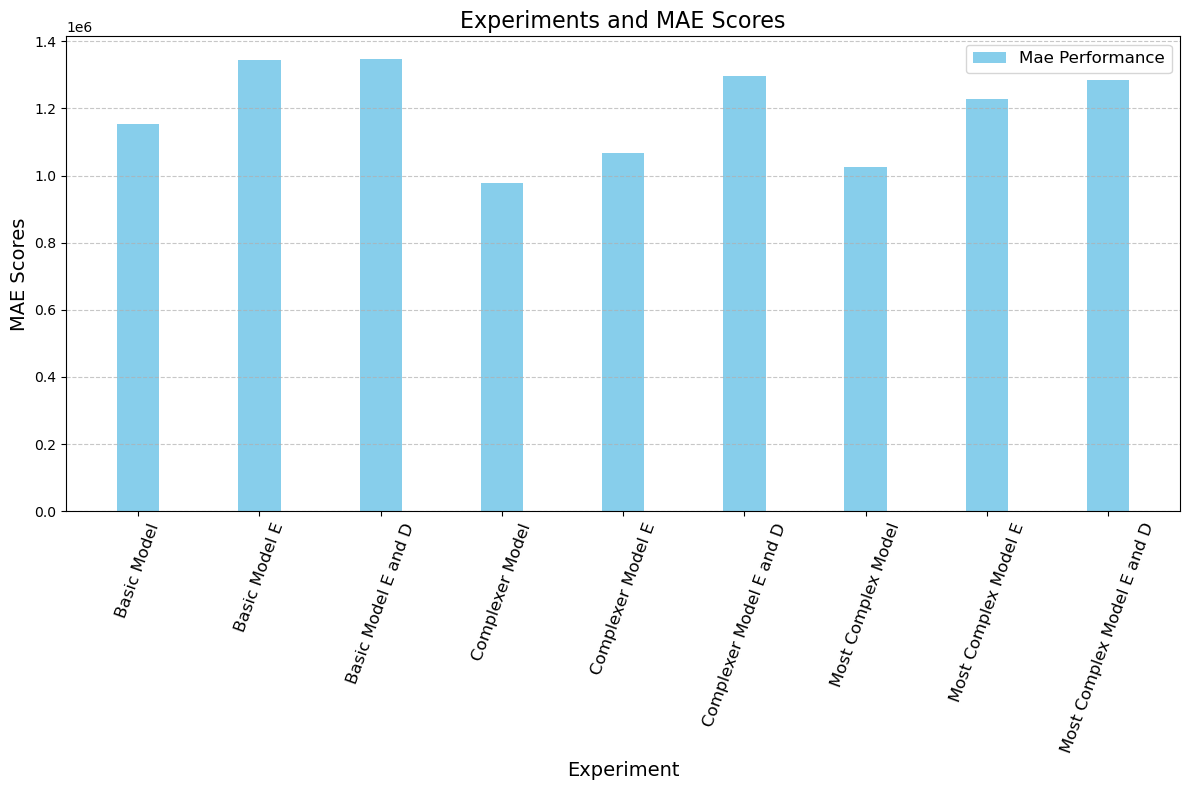

In [122]:
x = np.arange(len(classes))  
width = 0.35 

plt.figure(figsize=(12, 8))
plt.bar(x, maeResults, width, label='Mae Performance', color='skyblue') 

plt.title('Experiments and MAE Scores', fontsize=16)
plt.xlabel('Experiment', fontsize=14)
plt.ylabel('MAE Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12, rotation=70)
plt.legend(fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

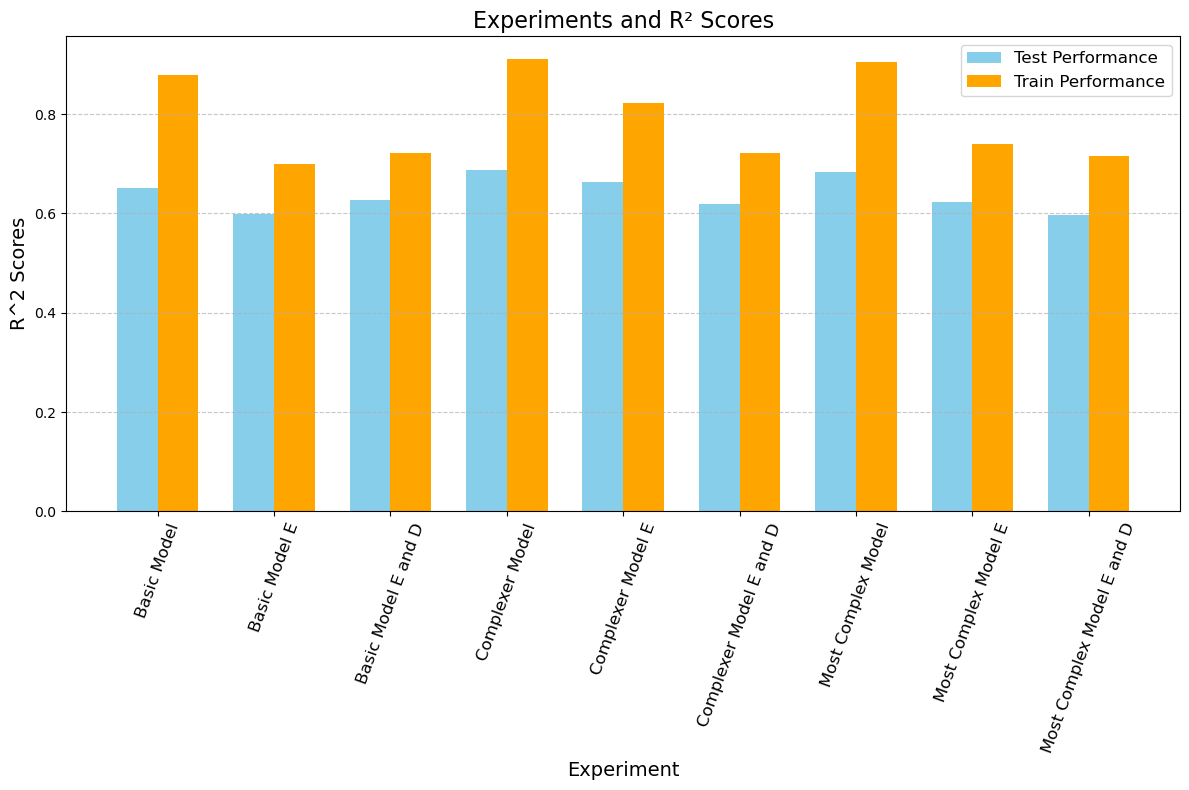

In [124]:
classes = ['Basic Model','Basic Model E' ,'Basic Model E and D','Complexer Model','Complexer Model E','Complexer Model E and D','Most Complex Model', 'Most Complex Model E', 'Most Complex Model E and D' ]

x = np.arange(len(classes))  
width = 0.35 

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, testResults, width, label='Test Performance', color='skyblue')  
plt.bar(x + width/2, trainResults, width, label='Train Performance', color='orange')  

plt.title('Experiments and R² Scores', fontsize=16)
plt.xlabel('Experiment', fontsize=14)
plt.ylabel('R^2 Scores', fontsize=14)
plt.xticks(x, classes, fontsize=12, rotation=70) 
plt.legend(fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [128]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 days 3 hours 14 mins
H2O_cluster_timezone:,Europe/Istanbul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_ardaacikgoz_g7in7l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.138 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [130]:
df

,Market_Value,overall,potential,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,attack_work_rate,defense_work_rate,LWB,LB,CAM,RWB,CM,RB,CF,CB,CDM,RM,LW,LM,RW,ST
0,3000000,0.571429,0.533333,0.478261,0.666667,0.413793,0.00,0.75,0.333333,0.0,0.402778,0.6000,0.710145,0.661765,0.662162,0.650794,0.719512,0.517647,0.524390,0.774648,0.658537,0.6875,0.698795,0.518072,0.779221,0.742857,0.426667,0.375000,0.492958,0.636364,0.632911,0.746988,0.514286,0.608696,0.623377,0.743902,0.734940,0.753086,0.571429,0.746988,0.388235,0.5625,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3000000,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0.0,0.402778,0.5750,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.524390,0.718310,0.658537,0.6750,0.698795,0.518072,0.766234,0.714286,0.426667,0.375000,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.610390,0.707317,0.734940,0.753086,0.571429,0.734940,0.388235,0.5375,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2400000,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0.0,0.402778,0.5750,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.524390,0.718310,0.658537,0.6750,0.698795,0.518072,0.766234,0.714286,0.426667,0.375000,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.610390,0.707317,0.734940,0.753086,0.571429,0.734940,0.388235,0.5375,0.7375,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2800000,0.510204,0.577778,0.347826,0.666667,0.413793,0.00,0.75,0.000000,0.0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.6750,0.662651,0.409639,0.727273,0.714286,0.506667,0.375000,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.734940,0.388235,0.5750,0.7250,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2500000,0.510204,0.577778,0.347826,0.666667,0.413793,0.00,0.75,0.000000,0.0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.6750,0.662651,0.409639,0.727273,0.714286,0.506667,0.375000,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.734940,0.388235,0.5750,0.7250,0.691358,0.305556,0.18750,0.175,0.21875,0.250000,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46179,3000000,0.489796,0.622222,0.217391,0.583333,0.379310,0.00,1.00,0.000000,0.0,0.333333,0.2125,0.420290,0.397059,0.783784,0.666667,0.402439,0.188235,0.634146,0.507042,0.170732,0.3750,0.253012,0.168675,0.649351,0.428571,0.373333,0.305556,0.535211,0.575758,0.556962,0.530120,0.828571,0.623188,0.675325,0.109756,0.590361,0.777778,0.202381,0.506024,0.282353,0.8125,0.7875,0.753086,0.361111,0.31250,0.350,0.31250,0.166667,0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46180,3000000,0.530612,0.755556,0.130435,0.583333,0.379310,0.00,0.75,0.000000,0.0,0.472222,0.2125,0.420290,0.367647,0.78

In [154]:
h2o_data = h2o.H2OFrame(df)
train, test = h2o_data.split_frame(ratios=[0.8], seed=42)
XColumns = train.columns[1:]  
yColumns = train.columns[0]  


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [156]:
train

Market_Value,overall,potential,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,attack_work_rate,defense_work_rate,LWB,LB,CAM,RWB,CM,RB,CF,CB,CDM,RM,LW,LM,RW,ST
3e+06,0.571429,0.533333,0.478261,0.666667,0.413793,0,0.75,0.333333,0,0.402778,0.6,0.710145,0.661765,0.662162,0.650794,0.719512,0.517647,0.52439,0.774648,0.658537,0.6875,0.698795,0.518072,0.779221,0.742857,0.426667,0.375,0.492958,0.636364,0.632911,0.746988,0.514286,0.608696,0.623377,0.743902,0.73494,0.753086,0.571429,0.746988,0.388235,0.5625,0.7375,0.691358,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3e+06,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0,0.402778,0.575,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.52439,0.71831,0.658537,0.675,0.698795,0.518072,0.766234,0.714286,0.426667,0.375,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.61039,0.707317,0.73494,0.753086,0.571429,0.73494,0.388235,0.5375,0.7375,0.691358,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2.4e+06,0.530612,0.555556,0.434783,0.666667,0.413793,0.25,0.75,0.333333,0,0.402778,0.575,0.695652,0.647059,0.648649,0.634921,0.719512,0.505882,0.52439,0.71831,0.658537,0.675,0.698795,0.518072,0.766234,0.714286,0.426667,0.375,0.492958,0.621212,0.620253,0.686747,0.485714,0.608696,0.61039,0.707317,0.73494,0.753086,0.571429,0.73494,0.388235,0.5375,0.7375,0.691358,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2.8e+06,0.510204,0.577778,0.347826,0.666667,0.413793,0,0.75,0,0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.675,0.662651,0.409639,0.727273,0.714286,0.506667,0.375,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.73494,0.388235,0.575,0.725,0.691358,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2.5e+06,0.510204,0.577778,0.347826,0.666667,0.413793,0,0.75,0,0,0.444444,0.5125,0.666667,0.647059,0.648649,0.539683,0.695122,0.352941,0.585366,0.732394,0.658537,0.675,0.662651,0.409639,0.727273,0.714286,0.506667,0.375,0.521127,0.575758,0.620253,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.716049,0.619048,0.73494,0.388235,0.575,0.725,0.691358,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2.5e+06,0.55102,0.622222,0.304348,0.666667,0.413793,0,0.75,0,0,0.458333,0.5125,0.681159,0.661765,0.662162,0.539683,0.695122,0.352941,0.585366,0.746479,0.658537,0.6875,0.662651,0.409639,0.74026,0.728571,0.546667,0.375,0.521127,0.606061,0.64557,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.728395,0.642857,0.746988,0.388235,0.575,0.7375,0.716049,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3e+06,0.55102,0.622222,0.304348,0.666667,0.413793,0,0.75,0,0,0.458333,0.5125,0.681159,0.661765,0.662162,0.539683,0.695122,0.352941,0.585366,0.746479,0.658537,0.6875,0.662651,0.409639,0.74026,0.728571,0.546667,0.375,0.521127,0.606061,0.64557,0.722892,0.485714,0.536232,0.506494,0.719512,0.686747,0.728395,0.642857,0.746988,0.388235,0.575,0.7375,0.716049,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3.5e+06,0.571429,0.644444,0.26087,0.604167,0.413793,0,0.75,0.333333,0,0.513889,0.5125,0.695652,0.661765,0

In [158]:
test

Market_Value,overall,potential,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,attack_work_rate,defense_work_rate,LWB,LB,CAM,RWB,CM,RB,CF,CB,CDM,RM,LW,LM,RW,ST
1e+06,0.306122,0.511111,0.130435,0.604167,0.413793,0.25,0.5,0,0,0.541667,0.325,0.478261,0.5,0.527027,0.428571,0.439024,0.211765,0.414634,0.549296,0.280488,0.525,0.385542,0.409639,0.558442,0.557143,0.56,0.527778,0.492958,0.5,0.64557,0.433735,0.442857,0.463768,0.415584,0.512195,0.542169,0.691358,0.559524,0.614458,0.388235,0.425,0.6,0.530864,0.305556,0.1875,0.175,0.21875,0.25,0.5,0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
200000,0.367347,0.555556,0.217391,0.395833,0.224138,0,0.5,0,0,0.597222,0.2625,0.449275,0.485294,0.594595,0.47619,0.695122,0.294118,0.52439,0.478873,0.121951,0.5375,0.457831,0.373494,0.402597,0.485714,0.626667,0.569444,0.577465,0.454545,0.708861,0.313253,0.514286,0.550725,0.467532,0.219512,0.493976,0.604938,0.571429,0.46988,0.376471,0.5625,0.65,0.654321,0.194444,0.3125,0.175,0.3125,0.222222,1,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.6e+07,0.734694,0.711111,0.521739,0.375,0.258621,0,0.5,0.666667,0.5,0.805556,0.7875,0.753623,0.794118,0.837838,0.698413,0.804878,0.705882,0.731707,0.774648,0.926829,0.7875,0.746988,0.819277,0.753247,0.785714,0.84,0.75,0.887324,0.757576,0.822785,0.843373,0.671429,0.898551,0.545455,0.865854,0.795181,0.851852,0.845238,0.783133,0.764706,0.825,0.8625,0.839506,0.222222,0.21875,0.225,0.3125,0.25,1,0.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2e+07,0.734694,0.711111,0.521739,0.375,0.258621,0,0.5,0.666667,0.5,0.805556,0.7875,0.753623,0.794118,0.837838,0.698413,0.804878,0.705882,0.731707,0.774648,0.926829,0.7875,0.746988,0.819277,0.753247,0.785714,0.84,0.75,0.887324,0.757576,0.822785,0.843373,0.671429,0.898551,0.545455,0.865854,0.795181,0.851852,0.845238,0.783133,0.764706,0.825,0.8625,0.839506,0.222222,0.21875,0.225,0.3125,0.25,1,0.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
475000,0.469388,0.422222,0.565217,0.708333,0.603448,0.25,0.5,0,0.25,0.527778,0.35,0.492754,0.426471,0.702703,0.777778,0.646341,0.129412,0.658537,0.577465,0.414634,0.475,0.590361,0.60241,0.571429,0.471429,0.493333,0.555556,0.535211,0.424242,0.443038,0.722892,0.628571,0.594203,0.805195,0.585366,0.807229,0.691358,0.297619,0.373494,0.317647,0.7125,0.7,0.716049,0.194444,0.28125,0.175,0.3125,0.277778,0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
600000,0.510204,0.466667,0.521739,0.708333,0.603448,0,0.5,0,0.25,0.527778,0.35,0.507246,0.441176,0.702703,0.793651,0.646341,0.129412,0.670732,0.591549,0.414634,0.475,0.590361,0.60241,0.571429,0.485714,0.493333,0.555556,0.535211,0.454545,0.443038,0.73494,0.628571,0.608696,0.818182,0.585366,0.807229,0.703704,0.297619,0.373494,0.317647,0.7125,0.7125,0.728395,0.194444,0.28125,0.175,0.3125,0.277778,0.5,0.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2.2e+06,0.632653,0.688889,0.304348,0.5,0.189655,0,0.75,0.666667,0,0.875,0.7,0.652174,0.794118,0.202703,0.301587,0.719512,0.705882,0.658537,0.676056,0.658537,0.825,0.831325,0.566265,0.649351,0.757143,0.906667,0.819444,0.957746,0.636364,0.696203,0.698795,0.571429,0.637681,0.207792,0.756098,0.337349,0.160494,0.666667,0.710843,0.611765,0.225,0.2,0.185185,0.388889,0.34375,0.2,0.3125,0.222222,0.5,0.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2.2e+06,0.591837,0.711111,0.26087,0.479167,0.258621,0,0.75,0.666667,0,0.888889,0.7,0.652174,0.779412,0.162162,0.31746

In [160]:
XColumns

['overall',
 'potential',
 'age',
 'height_cm',
 'weight_kg',
 'league_level',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'a

In [162]:
yColumns

'Market_Value'

In [168]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_runtime_secs=600,  
                stopping_metric='RMSE',  
                seed=42)

aml.train(x=XColumns, y=yColumns, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/30
# GBM base models (used / total),6/13
# XGBoost base models (used / total),4/9
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [169]:
best_model = aml.leader

print(best_model.summary())

performance = best_model.model_performance(test)
print(performance)

Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       12/30
# GBM base models (used / total)           6/13
# XGBoost base models (used / total)       4/9
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 7749595250250.509
RMSE: 2783809.485264843
MAE: 1022954.1541842145
RMSLE: NaN
Mean Residual Deviance: 7749595250250.509
R^2: 0.6939598809205885
Null degrees of freedom: 9180
Residual degrees of freedom: 9168
Null devia